# Descriptive statistics and PCA Analysis for mtcars in R

https://rpubs.com/BillB/217355
Our question is an exploratory one: Which data field correlates most closely with mpg out of no. of cylinders and horsepower? We want to understand how each correlates with the miles per gallon data.

In [1]:
data(mtcars)
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html <br>
A data frame with 32 observations on 11 (numeric) variables. <br>
mpg  - Miles/(US) gallon <br>
cyl  - Number of cylinders <br>
disp - Displacement (cu.in.) <br>
hp   - Gross horsepower <br>
drat - Rear axle ratio <br>
wt   - Weight (1000 lbs) <br>
qsec - 1/4 mile time <br>
vs   - Engine (0 = V-shaped, 1 = straight) <br>
am   - Transmission (0 = automatic, 1 = manual) <br>
gear - Number of forward gears <br> 
carb - Number of carburetors

In [2]:
# the structure of the data set
str(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


In [3]:
# desriptive statistics for each field
summary(mtcars)

      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
      drat             wt             qsec             vs        
 Min.   :2.760   Min.   :1.513   Min.   :14.50   Min.   :0.0000  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   1st Qu.:0.0000  
 Median :3.695   Median :3.325   Median :17.71   Median :0.0000  
 Mean   :3.597   Mean   :3.217   Mean   :17.85   Mean   :0.4375  
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90   3rd Qu.:1.0000  
 Max.   :4.930   Max.   :5.424   Max.   :22.90   Max.   :1.0000  
       am              gear            carb      
 Min.   :0.0000   Min.   :3.000  

In [4]:
colSums(is.na(mtcars)) #compute the total missing values in each column

mpg  cyl disp   hp drat   wt qsec   vs   am gear carb 
   0    0    0    0    0    0    0    0    0    0    0

In [5]:
#install.packages("tidyverse")
#library(tidyverse)
duplicated(mtcars)
which(duplicated(mtcars))

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

integer(0)

In [6]:
require(psych)
describe(mtcars)

Loading required package: psych
Warning message:
"package 'psych' was built under R version 3.5.3"

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
mpg,1,32,20.090625,6.0269481,19.200,19.6961538,5.4114900,10.400,33.900,23.500,0.6106550,-0.37276603,1.06542396
cyl,2,32,6.187500,1.7859216,6.000,6.2307692,2.9652000,4.000,8.000,4.000,-0.1746119,-1.76211977,0.31570933
disp,3,32,230.721875,123.9386938,196.300,222.5230769,140.4763500,71.100,472.000,400.900,0.3816570,-1.20721195,21.90947271
hp,4,32,146.687500,68.5628685,123.000,141.1923077,77.0952000,52.000,335.000,283.000,0.7260237,-0.13555112,12.12031731
drat,5,32,3.596563,0.5346787,3.695,3.5792308,0.7042350,2.760,4.930,2.170,0.2659039,-0.71470062,0.09451874
wt,6,32,3.217250,0.9784574,3.325,3.1526923,0.7672455,1.513,5.424,3.911,0.4231465,-0.02271075,0.17296847
qsec,7,32,17.848750,1.7869432,17.710,17.8276923,1.4158830,14.500,22.900,8.400,0.3690453,0.33511422,0.31588992
vs,8,32,0.437500,0.5040161,0.000,0.4230769,0.0000000,0.000,1.000,1.000,0.2402577,-2.00193762,0.08909831
am,9,32,0.406250,0.4989909,0.000,0.3846154,0.0000000,0.000,1.000,1.000,0.3640159,-1.92474143,0.08820997
gear,10,32,3.687500,0.7378041,4.000,3.6153846,1.4826000,3.000,5.000,2.000,0.5288545,-1.06975068,0.13042656


In [7]:
install.packages("GGally")
suppressWarnings(library("GGally"))
suppressWarnings(library(ggplot2))


Installing package into 'C:/Users/Unknown/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'GGally' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Unknown\AppData\Local\Temp\RtmpodwaZS\downloaded_packages


Loading required package: ggplot2

Attaching package: 'ggplot2'

The following objects are masked from 'package:psych':

    %+%, alpha



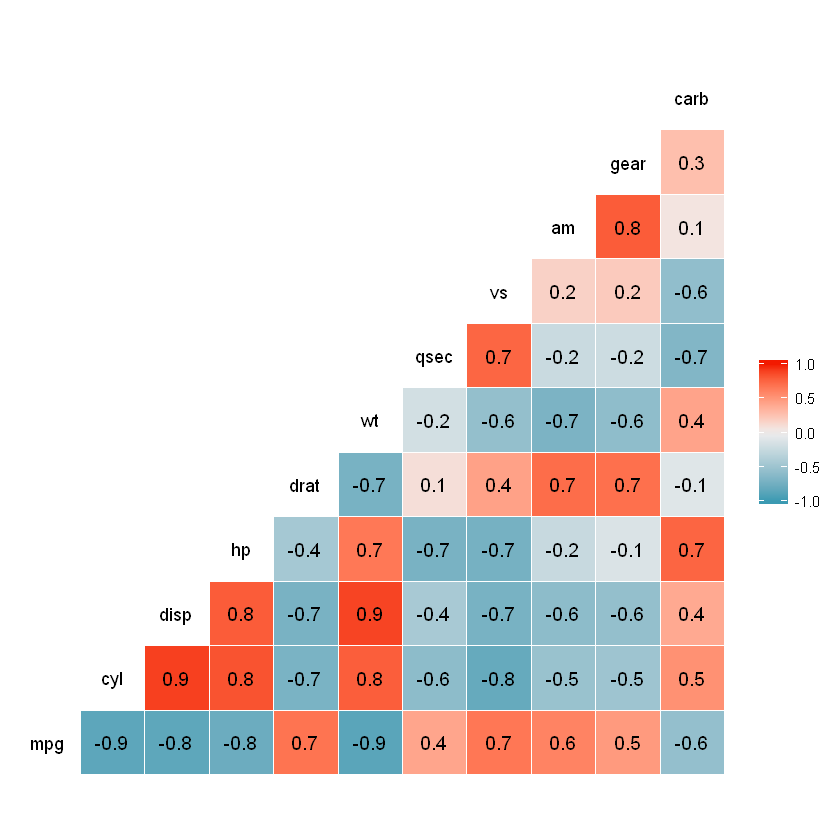

In [8]:
# Correlation plot
ggcorr(mtcars, palette = "RdBu", label = TRUE)

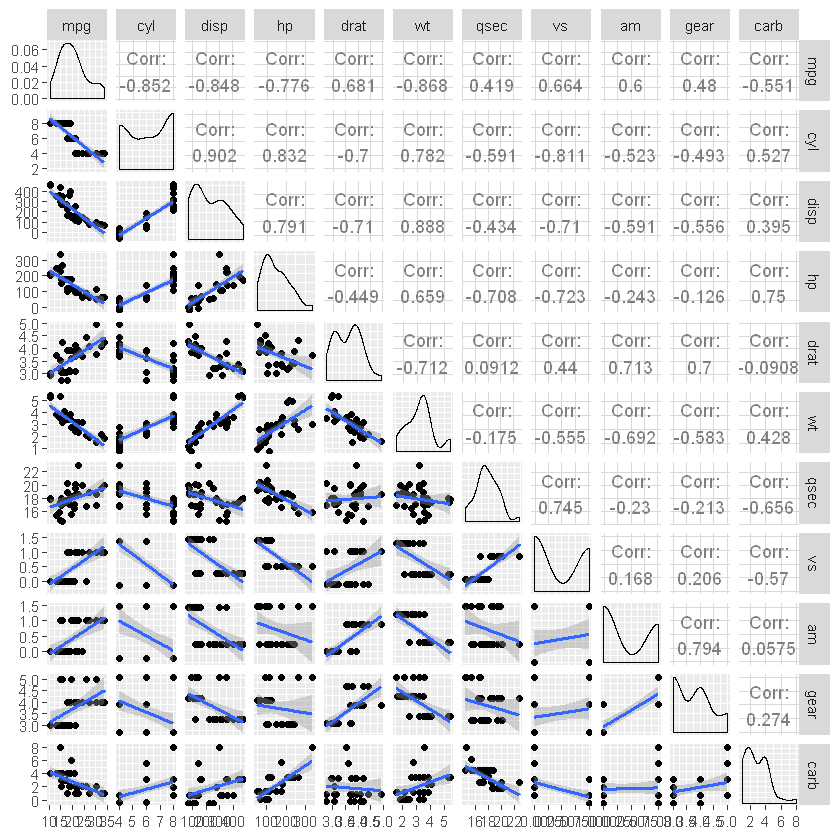

In [9]:
# https://stackoverflow.com/questions/35085261/how-to-use-loess-method-in-ggallyggpairs-using-wrap-function

# Function to obtain nice plots with ggpairs
my_fn <- function(data, mapping, method="loess", ...){
      p <- ggplot(data = data, mapping = mapping) + 
      geom_point() + 
      geom_smooth(method=method, ...)
      p
    }

# Default loess curve    
#ggpairs(mtcars, lower = list(continuous = my_fn))
# Use wrap to add further arguments; change method to lm

ggpairs(mtcars, lower = list(continuous = wrap(my_fn, method="lm")))

Note that this plot doesn’t work with factor variables, and the only categorical variables that should be included are either binary or ordinal. We can see that mpg is roughly normal (albeit a little positively skewed), and that the continuous variables and ordinal variables have linear relationship with mpg. We can also see there are a few very high intercorrelations between the potential predictor variables, but it is a little hard to pick these out in the volume of information.<br>
http://t-redactyl.io/blog/2015/11/linear-regression-tools-in-r.html

# Statistical Modeling with Some Variables in mtcars
https://rpubs.com/davoodastaraky/mtRegression

In [10]:
# To compare two samples to see if they have different means, we use two sample T-test.
# testing the null hypothesis that fuel efficiency, miles/gallon, is equal for cars with automatic and manual transmissions.
library(stats)
test <- t.test(mpg ~ am, data= mtcars, var.equal = FALSE, paired=FALSE ,conf.level = .95)
result <- data.frame( "t-statistic"  = test$statistic, 
                       "df" = test$parameter,
                        "p-value"  = test$p.value,
                        "lower CL" = test$conf.int[1],
                        "upper CL" = test$conf.int[2],
                        "automatic mean" = test$estimate[1],
                        "manual mean" = test$estimate[2],
                        row.names = "")
result=round(result,2)
result

t.statistic,df,p.value,lower.CL,upper.CL,automatic.mean,manual.mean
-3.77,18.33,0,-11.28,-3.21,17.15,24.39


p-value that shows the probability that this apparent difference between the two groups could appear by chance is very low. The confidence interval also describes how much lower the miles per gallon is in manual cars than it is in automatic cars. We can be confident that the true difference is between 3.2 and 11.3.

In [11]:
mpg.at <- mtcars[mtcars$am == 0,]$mpg
mpg.mt <- mtcars[mtcars$am == 1,]$mpg
t.test(mpg.mt, mpg.at) 


	Welch Two Sample t-test

data:  mpg.mt and mpg.at
t = 3.7671, df = 18.332, p-value = 0.001374
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  3.209684 11.280194
sample estimates:
mean of x mean of y 
 24.39231  17.14737 


The p-value is 0.001374 the difference in means is not equal to 0. The mean mileage of automatic transmission is 17.15 mpg and the manual transmission is 24.39 mpg. Manual transmission seems betterfor mileage.

Observations : Intercept represents empirical mean of Auto transmission (17.147368 mpg). Difference between means of Manual/Auto transmissions is 7.244939 mpg ie. Manual Transmission gives 7.244939 better milege. (Manual transmission Mean = 24.39231). Both intercept and slope are significant (P-value < 0.001). However, Adjusted R-squared is only 0.3385. So we need to find a better fitting model.<br>
http://www.rpubs.com/NarenShukla/117657

https://rstudio-pubs-static.s3.amazonaws.com/274541_340b563998fa40e68bdee897f5649932.html <br>
The mean mileage for cars with manual transmissions is approximatly 24 miles/gallon, while for automatics is approximatly 17 miles/gallon – a 7 miles/gallon difference in the sample. According to my analysis, I am 95% confident that the actual mileage difference between automatic and manual transmissions is between 3 and 11 miles per gallon.

If I set the probability of Type 1 error (error made rejecting the null hypothesis when it should not be rejected) to 0.05, I can reject the null hypothesis of “no difference” because the probability is 0.0013 of observing a t-value of 3.76, with 18 degrees of freedom, if the null hypothesis is true.

In [12]:
model1 <- lm(mpg ~ am, data = mtcars)
summary(model1)


Call:
lm(formula = mpg ~ am, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.3923 -3.0923 -0.2974  3.2439  9.5077 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   17.147      1.125  15.247 1.13e-15 ***
am             7.245      1.764   4.106 0.000285 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.902 on 30 degrees of freedom
Multiple R-squared:  0.3598,	Adjusted R-squared:  0.3385 
F-statistic: 16.86 on 1 and 30 DF,  p-value: 0.000285


In [13]:
 # Simple linear regression model
mtcars$amfactor <- factor(mtcars$am, labels = c("automatic", "manual")) 
summary(lm(mpg ~ factor(amfactor), data = mtcars))$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),17.147368,1.124603,15.247492,1.133983e-15
factor(amfactor)manual,7.244939,1.764422,4.106127,2.850207e-04


All the estimates provided here are in comparison with automatic transmission. The intercept of 17.14 is simply the mean MPG of automatic transmission. The slope of 7.24 is the change in the mean between manual transmission and automatic transmission. You can verify that from the plot as well. The p-value of 0.000285 for the mean MPG difference between manual and automatic transmission is significant. Therefore we conclude that according to this model manual transmission if more fuel efficient.

The model is here mpg=17.147+7.254 amManual, and this quantifies the difference between the two transmissions. Note also that regression answers the two questions at the same time.

We see here that the regression model covers only 36% of the variance. 

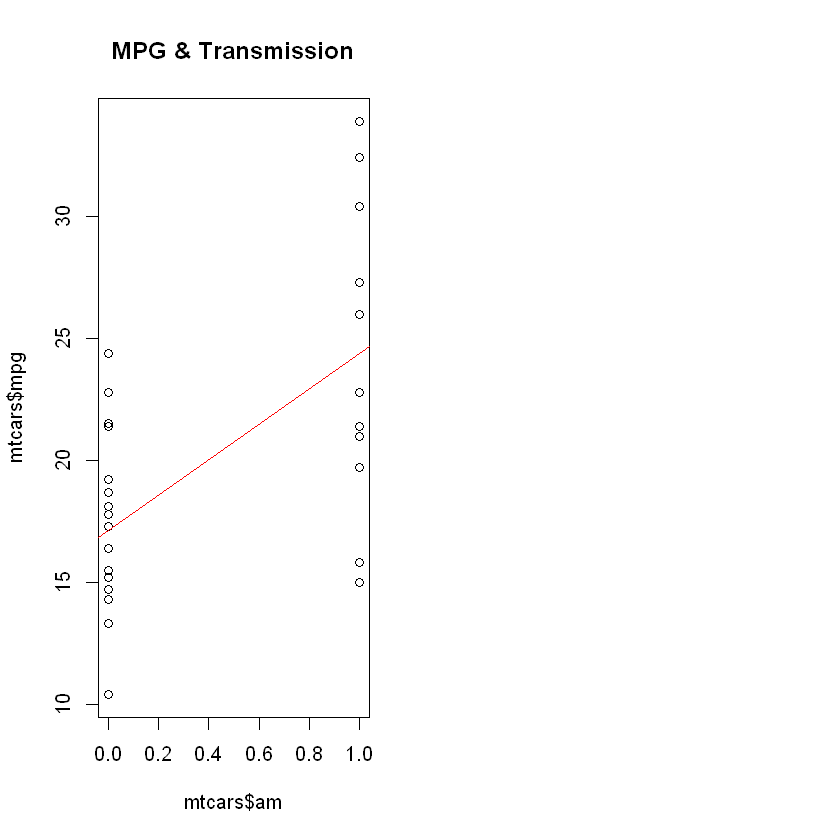

In [14]:
par(mfrow = c(1,2))
plot(mtcars$am, mtcars$mpg, main = 'MPG & Transmission')
abline(lm(mpg ~ factor(amfactor), data = mtcars), col="red")

The slope of the regression line is appoximately 7, which is change in mpg for a change of one unit in am (the difference between automatic transmissions, coded “0”, and manual transmissions, coded “1”). This is the same result as for the t-test.

# Fitting multivariable linear regression model

We use following Backward Elimiation Strategy. Start with a Model that includes all potential Predictor variables. Eliminate variables, one, at a time. Drop the variable, with the largest P-value. Re-fit the model. Re-assess inclusion of all variables. Repeat these steps, until only variables with Statistically Significant P-Values remain. That’s your Final Model. We start with including all variables.<br>
http://www.rpubs.com/NarenShukla/117657

In [15]:
fit10<-lm(mpg ~ cyl+disp+hp+drat+wt+qsec+factor(vs)+factor(am)+gear+carb, data = mtcars)
max(summary(fit10)$coef[-1,4])

[1] 0.9160874

In [16]:
# we include all the variables, not of them will a significant predictor of MPG (judging by p-value at the 95% confidence level).
summary(lm(mpg ~ cyl+disp+hp+drat+wt+qsec+factor(vs)+factor(am)+gear+carb, data = mtcars))$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),12.30337416,18.71788443,0.6573058,0.51812440
cyl,-0.11144048,1.04502336,-0.1066392,0.91608738
disp,0.01333524,0.01785750,0.7467585,0.46348865
hp,-0.02148212,0.02176858,-0.9868407,0.33495531
drat,0.78711097,1.63537307,0.4813036,0.63527790
wt,-3.71530393,1.89441430,-1.9611887,0.06325215
qsec,0.82104075,0.73084480,1.1234133,0.27394127
factor(vs)1,0.31776281,2.10450861,0.1509915,0.88142347
factor(am)1,2.52022689,2.05665055,1.2254035,0.23398971
gear,0.65541302,1.49325996,0.4389142,0.66520643


Detecting collinearity

A major problem with multivariate regression is collinearity. If two or more predictor variables are highly correlated, and they are both entered into a regression model, it increases the true standard error and you get a very unstable estimates of the slope. We can assess the collinearity by variance inflation factor (VIF). Lets look at the variance inflation factors if we throw all the variables into the model.

In [17]:
suppressWarnings(library(car))
fitvif <- lm(mpg ~ cyl+disp+hp+drat+wt+qsec+factor(vs)+factor(am)+gear+carb, data = mtcars)
fitvif
vif(fitvif)

Loading required package: carData

Attaching package: 'car'

The following object is masked from 'package:psych':

    logit




Call:
lm(formula = mpg ~ cyl + disp + hp + drat + wt + qsec + factor(vs) + 
    factor(am) + gear + carb, data = mtcars)

Coefficients:
(Intercept)          cyl         disp           hp         drat           wt  
   12.30337     -0.11144      0.01334     -0.02148      0.78711     -3.71530  
       qsec  factor(vs)1  factor(am)1         gear         carb  
    0.82104      0.31776      2.52023      0.65541     -0.19942  


cyl       disp         hp       drat         wt       qsec factor(vs) 
 15.373833  21.620241   9.832037   3.374620  15.164887   7.527958   4.965873 
factor(am)       gear       carb 
  4.648487   5.357452   7.908747

Values for the VIF that are greater than 10 are considered large. We should also pay attention to VIf values between 5 and 10. At these point we might consider leaving only one of these variables in the model.

Stepwise selection method

Among available methods we decided to perform stepwise selection to help us select a subset of variables that best explain the MPG. Please note that we also treat the vs variable as a categorical variable.

So, we eliminate the {cyl} variable. We repeat above steps, removing 1 variable, at a time. We basically remove these variables, in this order : {vs}, {carb}, {gear}, {drat}, {disp}, {hp}. We are left with this model (we could have let R do the trick with step command),

In [18]:
suppressWarnings(library(MASS))
fit <- lm(mpg ~ cyl+disp+hp+drat+wt+qsec+factor(vs)+factor(am)+gear+carb, data = mtcars)
step <- stepAIC(fit, direction="both", trace=FALSE)
summary(step)$coeff

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),9.617781,6.9595930,1.381946,1.779152e-01
wt,-3.916504,0.7112016,-5.506882,6.952711e-06
qsec,1.225886,0.2886696,4.246676,2.161737e-04
factor(am)1,2.935837,1.4109045,2.080819,4.671551e-02


In [19]:
summary(step)$r.squared

[1] 0.8496636

This shows that in addition to transmission, weight of the vehicle as well as acceleration speed have the highest relation to explaining the variation in mpg. The adjusted R^2 is 84% which means that the model explains 84% of the variation in mpg indicating it is a robust and highly predictive model.

Observations from the (model1) model : Intercept represents empirical mean of Auto transmission 9.617781 mpg for 0 weight and qsec variables. Difference between means of Manual/Auto transmissions is 2.935837 mpg ie. Manual Transmission gives 2.935837 better milege holding wt and qsec variables constant. Milege given by Manual Transmission = 12.55362 mpg. There is an estimated 3.916504 decrease in MPG per one ton increase in weight of the car, holding am and qsec variables constant. There is estimated 1.225886 MPG increase, per unit increase in qsec variable, holding am and wt variables constant, qsec variable measures “1/4th mile time”.

Uncertainty noted : Residual Standard Error is 2.459. Our Model fits only 83.36%.

The workhorse here is the automatic step-wise model contruction. Other powerfull model like lasso (penalized regression) can also handle very efficienlty the problem. We show here the different models found by the algorithm.
<br>https://rstudio-pubs-static.s3.amazonaws.com/274244_f1931c30b4d641d5a72d90f0a19c7773.html

In [20]:
Multi = lm(data = mtcars, mpg~.)
Best <- (step(Multi,trace=0)) #automatic step-wise model contruction.
summary(Best)


Call:
lm(formula = mpg ~ wt + qsec + am, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4811 -1.5555 -0.7257  1.4110  4.6610 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.6178     6.9596   1.382 0.177915    
wt           -3.9165     0.7112  -5.507 6.95e-06 ***
qsec          1.2259     0.2887   4.247 0.000216 ***
am            2.9358     1.4109   2.081 0.046716 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.459 on 28 degrees of freedom
Multiple R-squared:  0.8497,	Adjusted R-squared:  0.8336 
F-statistic: 52.75 on 3 and 28 DF,  p-value: 1.21e-11


The best model formula found here is mpg ~ wt + qsec + am

The model that shows a better mpg for manual transmission is now mpg=9.61+2.93 amManual-3.91 wt +1.22 qsec (all predictors significant), and this also quantifies the difference between the two transmissions. In this model 1.80 is the adjusted coefficient that links mpg and the transmission and we can see here that the regression model covers now 85% of the variance. The conclusion is now stronger than with the mono-variable scheme.


Observations : RSS (Residual Sum of Squares) is reduced in the new model from 720.90 to 169.29, which is good. P-value of this test is 1.55e-09 which is less than alpha ie. 0.001. So new model (Best) is Significantly Better than old one (model1). Adjusted R-squared value for (Best) is 0.8336, which is much better than Adjusted R-squared (model) value of 0.3385.

In [21]:
#  apply anova (Analysis of Variation) technique, to both models.
anova(model1,Best)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
30,720.8966,NA,NA,NA,NA
28,169.2859,2,551.6107,45.61838,1.550495e-09


Observations : RSS (Residual Sum of Squares) is reduced in the new model from 720.90 to 169.29, which is good. P-value of this test is 1.55e-09 which is less than alpha ie. 0.001. So new model (Best) is Significantly Better than old one (model1). Adjusted R-squared value for (Best) is 0.8336, which is much better than Adjusted R-squared (model1) value of 0.3385.

The diagnostic plots shows that the regression was numerically efficient: residuals are randomly distributed, and lies on the normality line (QQ-plot

Observations : Looking at {Residual vs Fitted plot}, variability of the residuals is nearly constant. Looking at {Q-Q plot}, Residuals of the model are nearly normal. Looking at {Residual vs Leverage plot}, we see few cars with high leverage ie “Chrysler Imperial”, “Merc 230” and “Fiat 128”. This can be confirmed by running hatvalues(Best) command.

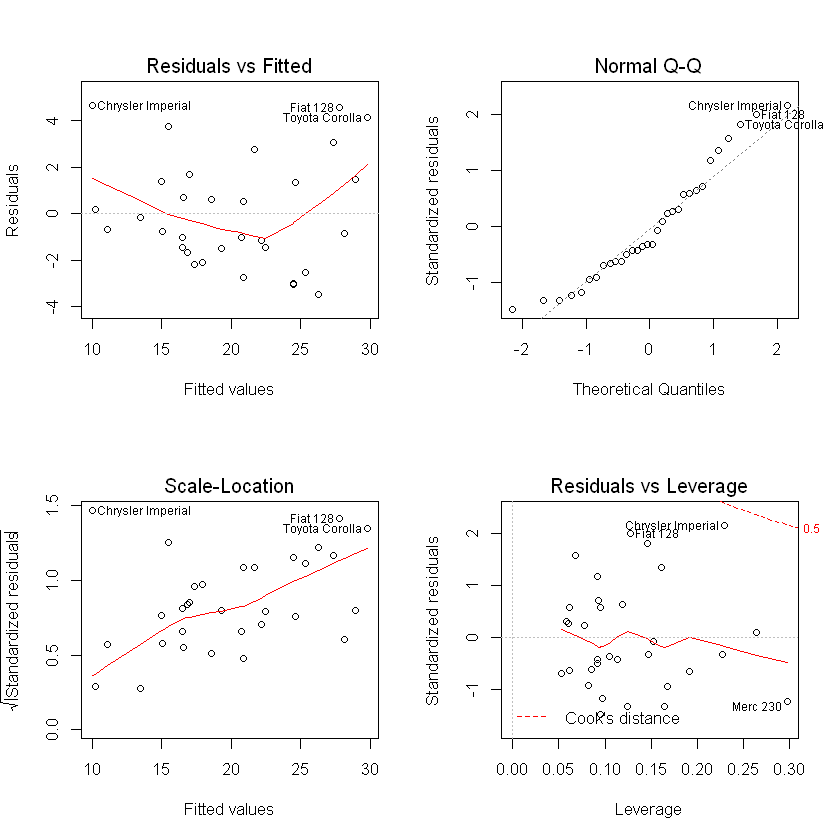

In [22]:
par(mfrow = c(2,2))
plot(Best)

Nested likelihood ratio test

If the models of interest are nested and without lots of parameters differentiating them, it’s fairly uncontroversial to use nested likelihood ratio tests. So in order to verify the result of the stepwise selection model, we also perform this procedure below.

In [23]:
fit1 <- lm(mpg ~ factor(am), data = mtcars)
fit2 <- lm(mpg ~ factor(am)+wt, data = mtcars)
fit3 <- lm(mpg ~ factor(am)+wt+qsec, data = mtcars)
fit4 <- lm(mpg ~ factor(am)+wt+qsec+hp, data = mtcars)
fit5 <- lm(mpg ~ factor(am)+wt+qsec+hp+drat, data = mtcars)
anova(fit1, fit2, fit3, fit4, fit5)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
30,720.8966,NA,NA,NA,NA
29,278.3197,1,442.576902,72.5359307,5.361896e-09
28,169.2859,1,109.033768,17.8700375,2.578911e-04
27,160.0665,1,9.219469,1.5110205,2.299925e-01
26,158.6386,1,1.427847,0.2340163,6.326111e-01


As you can see, the result is consistent with stepwise selection model and adding any more variable in addition to wt, am and qsec will dramatically increase the variation in the model, and the p-value immediately becomes insignificant.

Fitting the final model

Now using the selected variables, we can fit the final model.

In [24]:
finalfit <- lm(mpg ~ wt+qsec+factor(am), data = mtcars)
summary(finalfit)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),9.617781,6.9595930,1.381946,1.779152e-01
wt,-3.916504,0.7112016,-5.506882,6.952711e-06
qsec,1.225886,0.2886696,4.246676,2.161737e-04
factor(am)1,2.935837,1.4109045,2.080819,4.671551e-02


You can observe that all the variables now are statistically significant. This model explains 84% of the variance in miles per gallon (mpg). Now when we read the coefficient for am, we say that, on average, manual transmission cars have 2.94 MPGs more than automatic transmission cars. However this effect was much higher than when we did not adjust for weight and qsec.

Regression diagnostics:

Detecting collinearity

This time looking at variance inflation factors reveal that the numbers are reasonable and we dont detect any sign of collinearity.

In [25]:
fitvif <- lm(mpg ~ wt+qsec+factor(am), data = mtcars)
vif(fitvif)

wt       qsec factor(am) 
  2.482952   1.364339   2.541437

Normality of residuals

The normal Q-Q plot, is you’re trying to figure out the normality of the errors by plotting the theoretical quantiles of the standard normal distribution by the standardized residuals.

Chrysler Imperial          Fiat 128 
               17                18

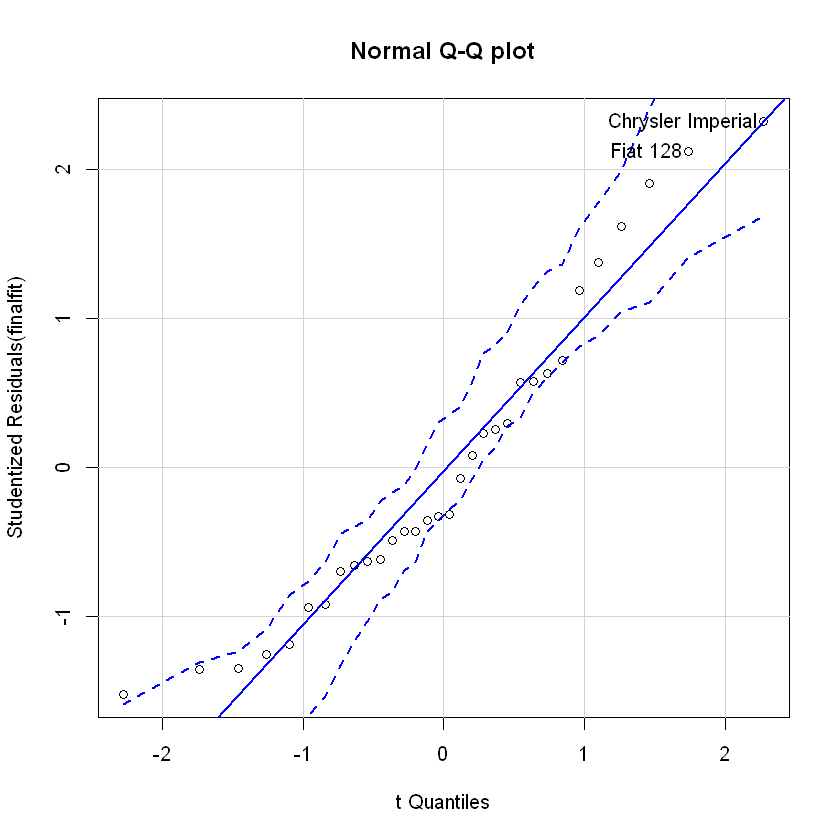

In [26]:
qqPlot(finalfit, main="Normal Q-Q plot")

# Compute the Principal Components

Because PCA works best with numerical data, you'll exclude the two categorical variables (vs and am). You are left with a matrix of 9 columns and 32 rows, which you pass to the prcomp() function, assigning your output to mtcars.pca. You will also set two arguments, center and scale, to be TRUE. Then you can have a peek at your PCA object with summary().

In [66]:
mtcars.pca <- prcomp(mtcars[,c(1:7,10,11)], center = TRUE,scale. = TRUE)
#mydata <- scale(mtcars[,c(0:11)], center=T, scale=T)
#mtcars.pca <- prcomp(mydata, center=F, scale=F,retx=T)
#mtcars.pca <- prcomp(mtcars[,c(0:11)], center = TRUE,scale. = TRUE)  #The option retx=T indicates that we will get the scores.
summary(mtcars.pca)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.3782 1.4429 0.71008 0.51481 0.42797 0.35184 0.32413
Proportion of Variance 0.6284 0.2313 0.05602 0.02945 0.02035 0.01375 0.01167
Cumulative Proportion  0.6284 0.8598 0.91581 0.94525 0.96560 0.97936 0.99103
                          PC8     PC9
Standard deviation     0.2419 0.14896
Proportion of Variance 0.0065 0.00247
Cumulative Proportion  0.9975 1.00000

In [67]:
names(mtcars[,c(1:7,10,11)])

[1] "mpg"  "cyl"  "disp" "hp"   "drat" "wt"   "qsec" "gear" "carb"

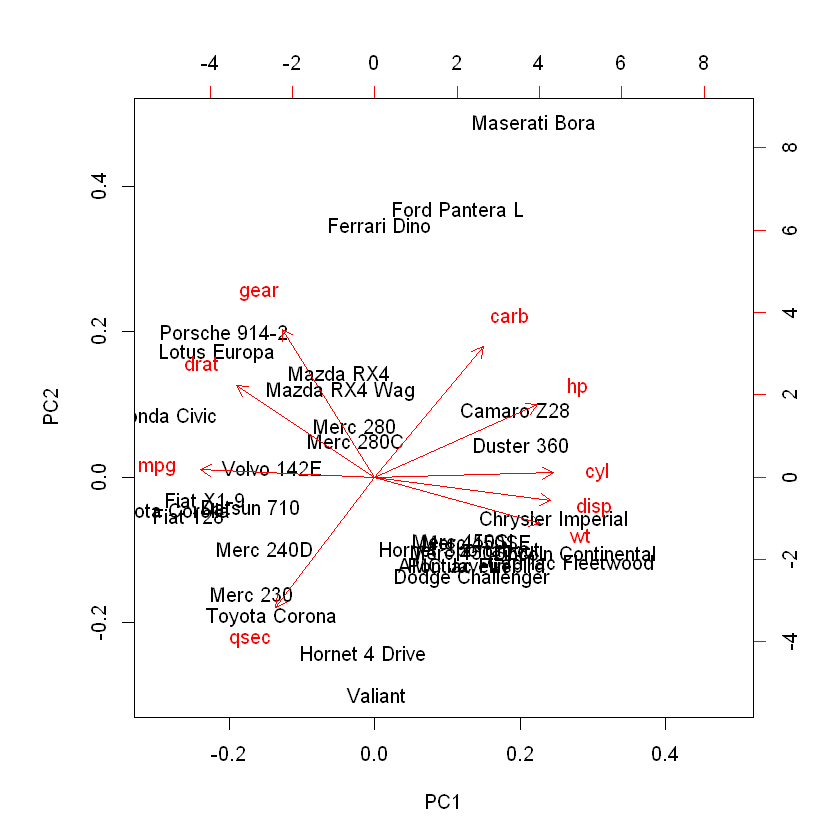

In [68]:
biplot(mtcars.pca)

In [69]:
str(mtcars.pca)

List of 5
 $ sdev    : num [1:9] 2.378 1.443 0.71 0.515 0.428 ...
 $ rotation: num [1:9, 1:9] -0.393 0.403 0.397 0.367 -0.312 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:9] "mpg" "cyl" "disp" "hp" ...
  .. ..$ : chr [1:9] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:9] 20.09 6.19 230.72 146.69 3.6 ...
  ..- attr(*, "names")= chr [1:9] "mpg" "cyl" "disp" "hp" ...
 $ scale   : Named num [1:9] 6.027 1.786 123.939 68.563 0.535 ...
  ..- attr(*, "names")= chr [1:9] "mpg" "cyl" "disp" "hp" ...
 $ x       : num [1:32, 1:9] -0.664 -0.637 -2.3 -0.215 1.587 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:32] "Mazda RX4" "Mazda RX4 Wag" "Datsun 710" "Hornet 4 Drive" ...
  .. ..$ : chr [1:9] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


In [84]:
head(mtcars.pca)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
mpg,-0.3931477,0.02753861,-0.22119309,-0.006126378,-0.3207620,0.72015586,-0.38138068,-0.12465987,0.11492862
cyl,0.4025537,0.01570975,-0.25231615,0.040700251,0.1171397,0.22432550,-0.15893251,0.81032177,0.16266295
disp,0.3973528,-0.08888469,-0.07825139,0.339493732,-0.4867849,-0.01967516,-0.18233095,-0.06416707,-0.66190812
hp,0.3670814,0.26941371,-0.01721159,0.068300993,-0.2947317,0.35394225,0.69620751,-0.16573993,0.25177306
drat,-0.3118165,0.34165268,0.14995507,0.845658485,0.1619259,-0.01536794,0.04767957,0.13505066,0.03809096
wt,0.3734771,-0.17194306,0.45373418,0.191260029,-0.1874822,-0.08377237,-0.42777608,-0.19839375,0.56918844
qsec,-0.2243508,-0.48404435,0.62812782,-0.030329127,-0.1482495,0.25752940,0.27622581,0.35613350,-0.16873731
gear,-0.2094749,0.55078264,0.20658376,-0.282381831,-0.5624860,-0.32298239,-0.08555707,0.31636479,0.04719694
carb,0.2445807,0.48431310,0.46412069,-0.214492216,0.3997820,0.35706914,-0.20604210,-0.10832772,-0.32045892
,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9


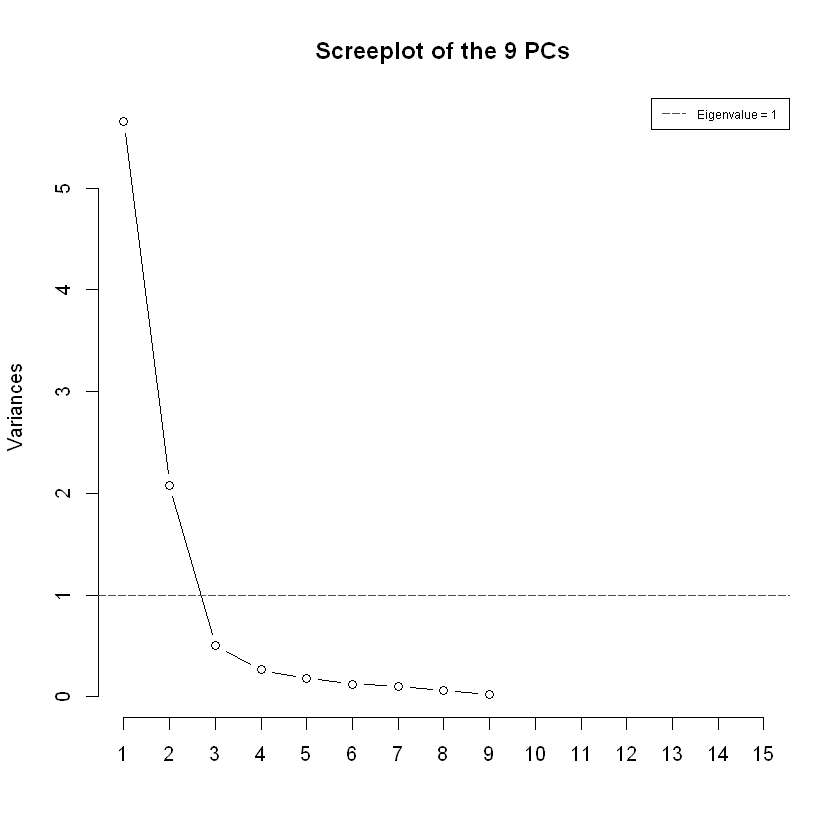

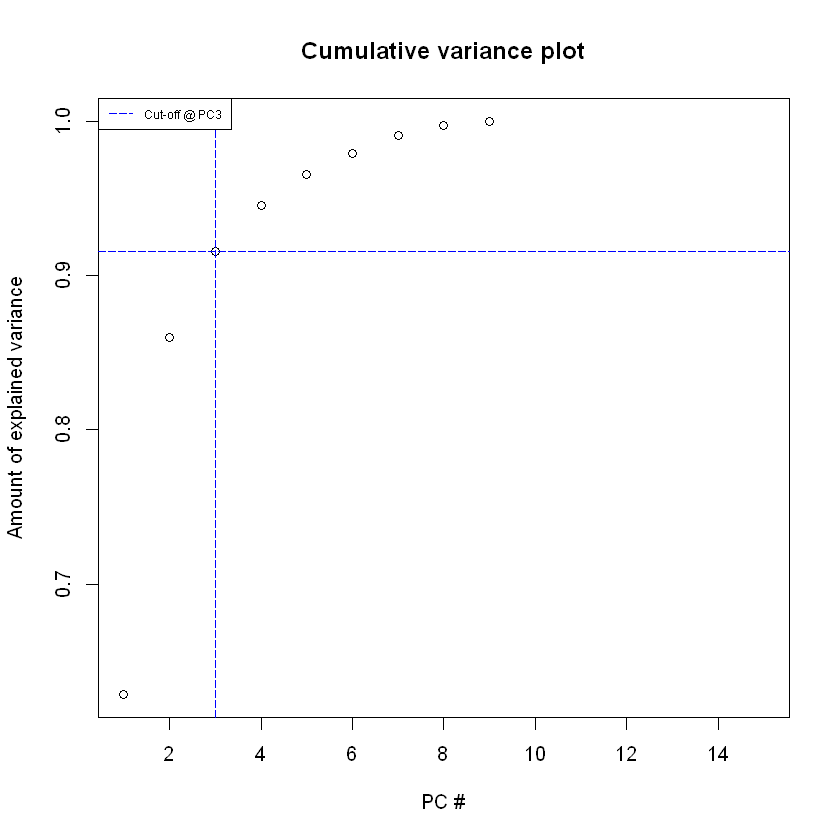

In [81]:
# We notice is that the first 3 components has an Eigenvalue >1 and explains over 90% of variance

screeplot(mtcars.pca, type = "l", npcs = 15, main = "Screeplot of the 9 PCs")
abline(h = 1, col="red", lty=5)
legend("topright", legend=c("Eigenvalue = 1"),
       col=c("red"), lty=5, cex=0.6)

cumpro <- cumsum(mtcars.pca$sdev^2 / sum(mtcars.pca$sdev^2))
plot(cumpro[0:15], xlab = "PC #", ylab = "Amount of explained variance", main = "Cumulative variance plot")
abline(v = 3, col="blue", lty=5)      # first 3 components v=3
abline(h = 0.91581, col="blue", lty=5)  # Cumulative Proportion PC3 = 0.91581
legend("topleft", legend=c("Cut-off @ PC3"),
       col=c("blue"), lty=5, cex=0.6)

# Hierarchical clustering

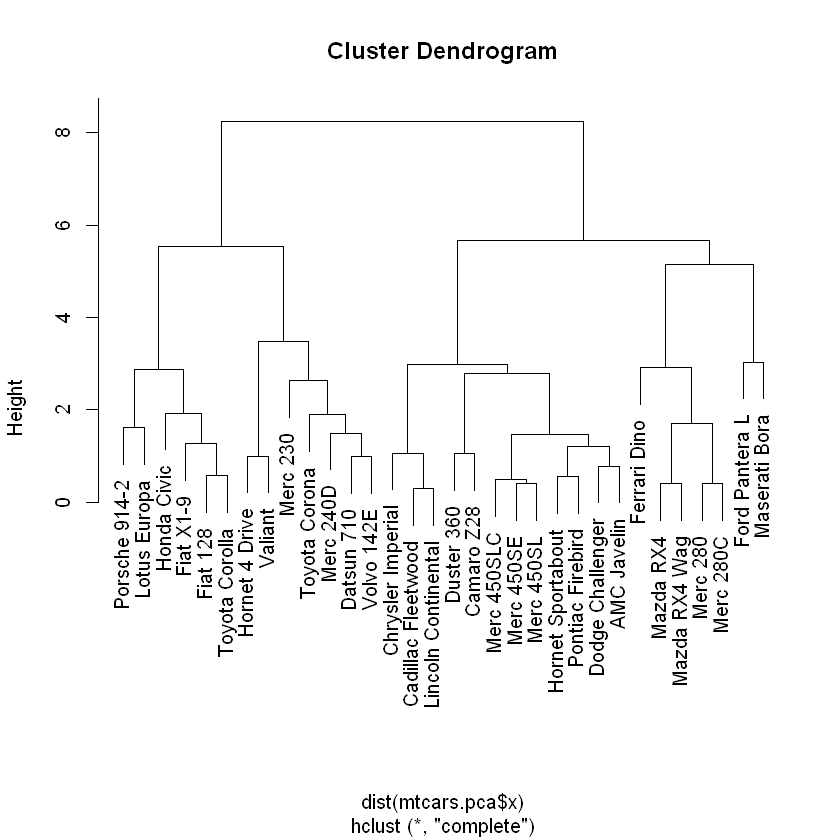

In [107]:
# cluster cars
#carsHC <- hclust(dist(mtcars.pca$x), method = "ward.D2")
carsHC <- hclust(dist(mtcars.pca$x))
# dendrogram
plot(carsHC)

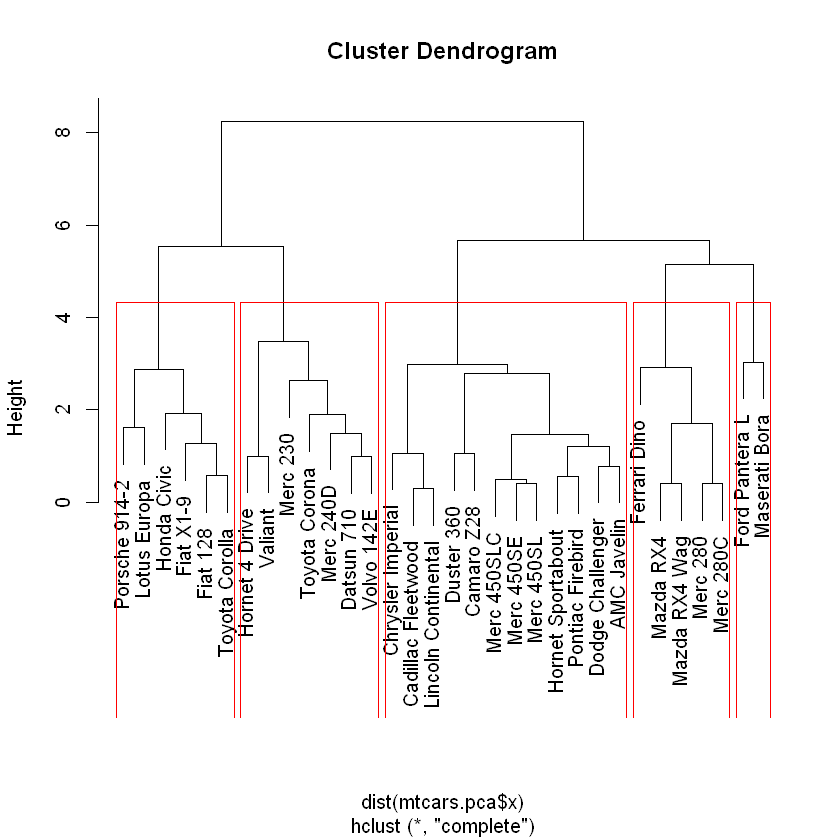

In [108]:
# cut the dendrogram into 5 clusters
carsClusters <- cutree(carsHC, k = 5)

# draw dendogram with red borders around the 3 clusters 
plot(carsHC)
rect.hclust(carsHC, k=5, border="red")

In [109]:
#install.packages("factoextra")
#library(factoextra)
require(factoextra)

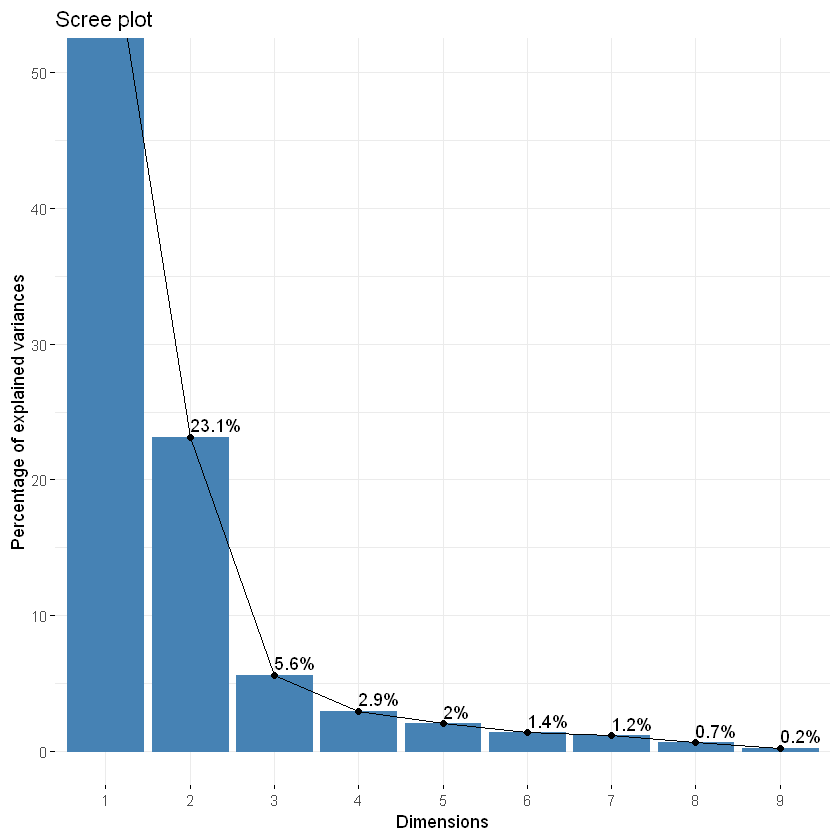

In [110]:
# Visualize eigenvalues/variances
fviz_screeplot(mtcars.pca, addlabels = TRUE, ylim = c(0, 50))

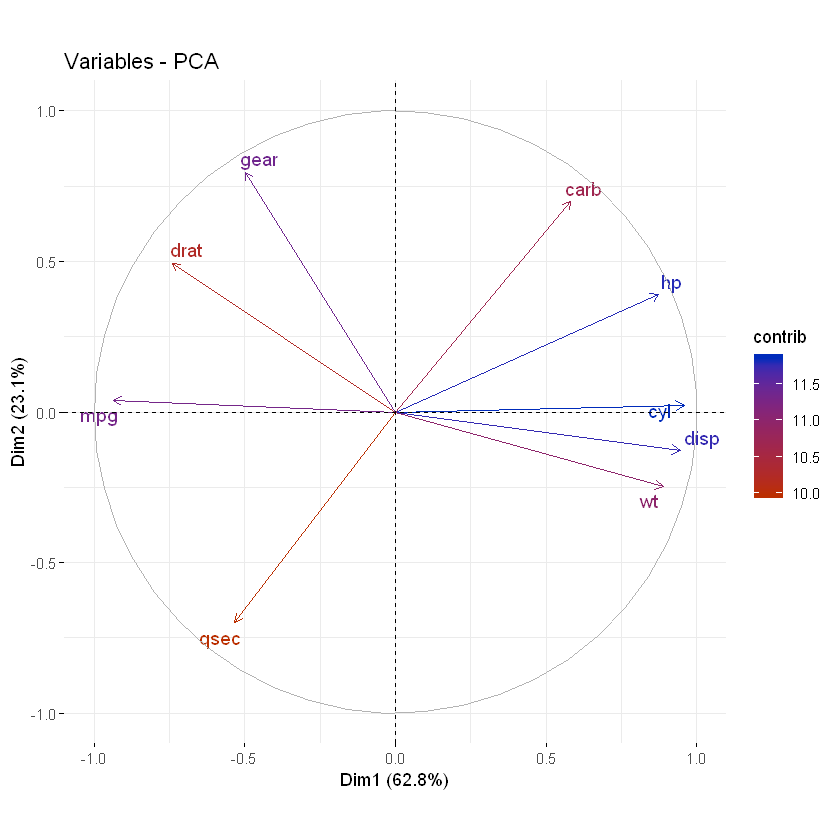

In [111]:
fviz_pca_var(mtcars.pca,  col.var = "contrib", gradient.cols = c("#bb2e00", "#002bbb"), repel = TRUE)

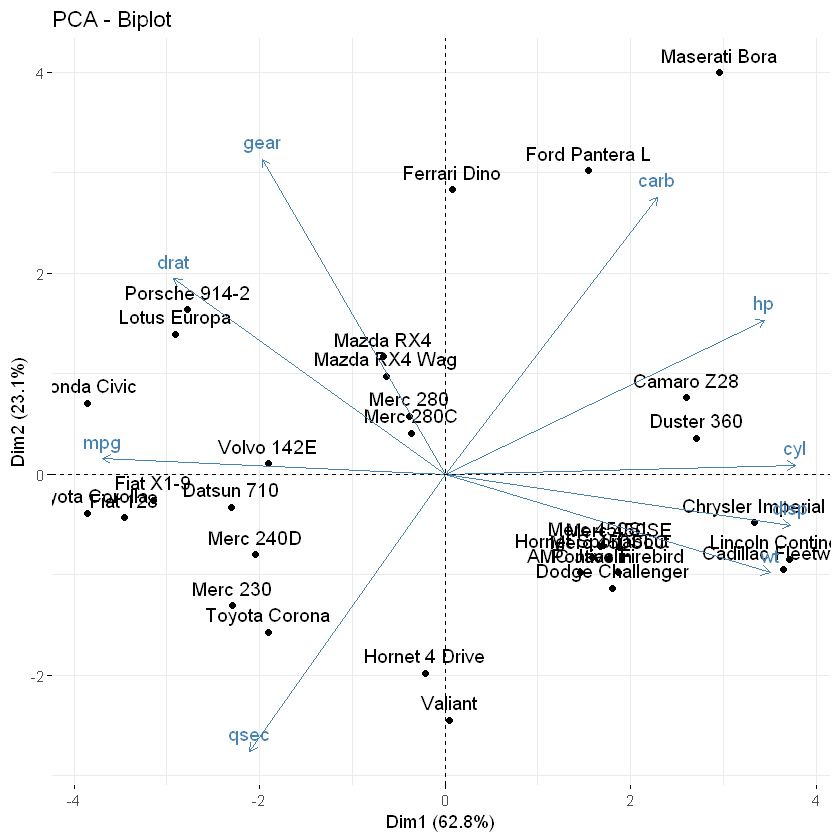

In [112]:
fviz_pca_biplot(mtcars.pca)

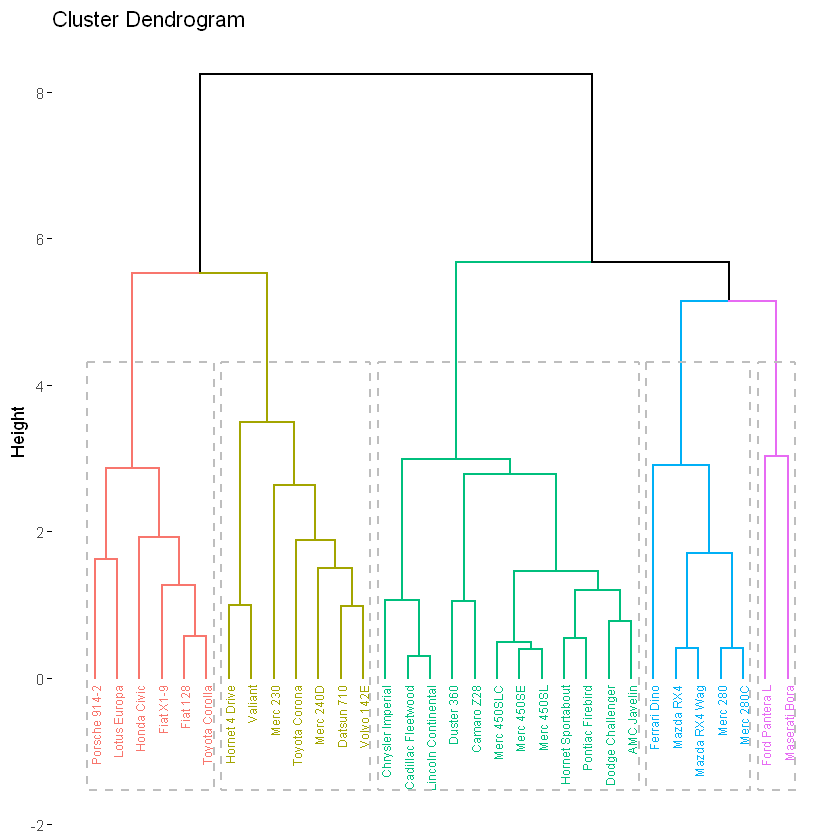

In [113]:
# Change the color of tree into 5 groups
# Change rectangle border colors
# Hierarchical clustering

fviz_dend(carsHC, cex = 0.5, k = 5, color_labels_by_k = TRUE, , rect = TRUE)

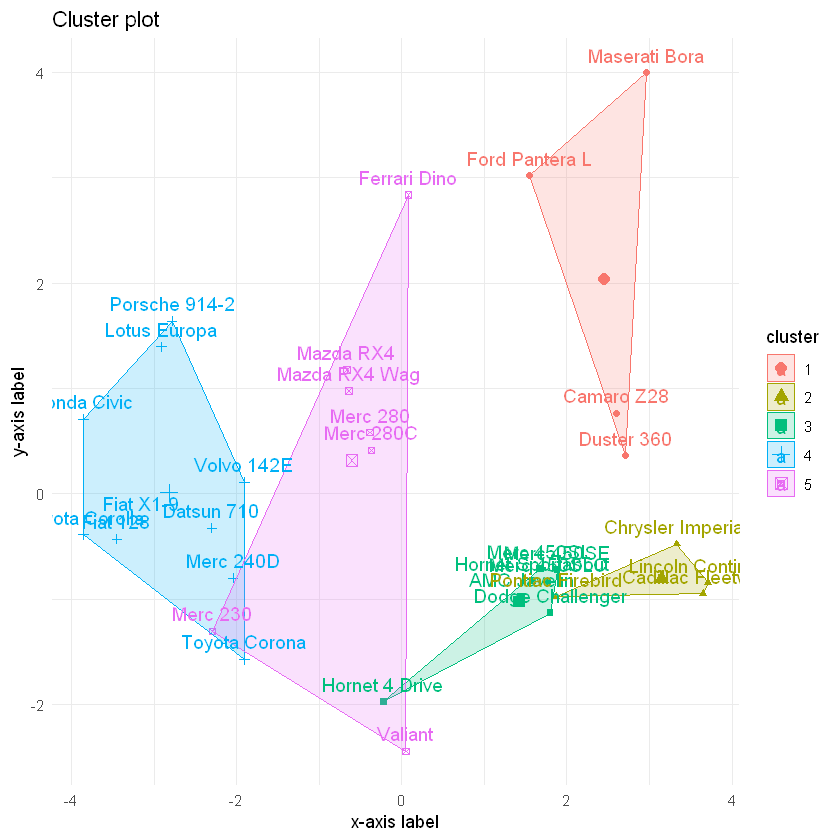

In [114]:
km.res <- kmeans(mtcars[,c(1:7,10,11)], 5, nstart = 25)
fviz_cluster(km.res, data = mtcars[,c(1:7,10,11)], ellipse.type ="convex", xlab = "x-axis label", ylab = "y-axis label") +theme_minimal()

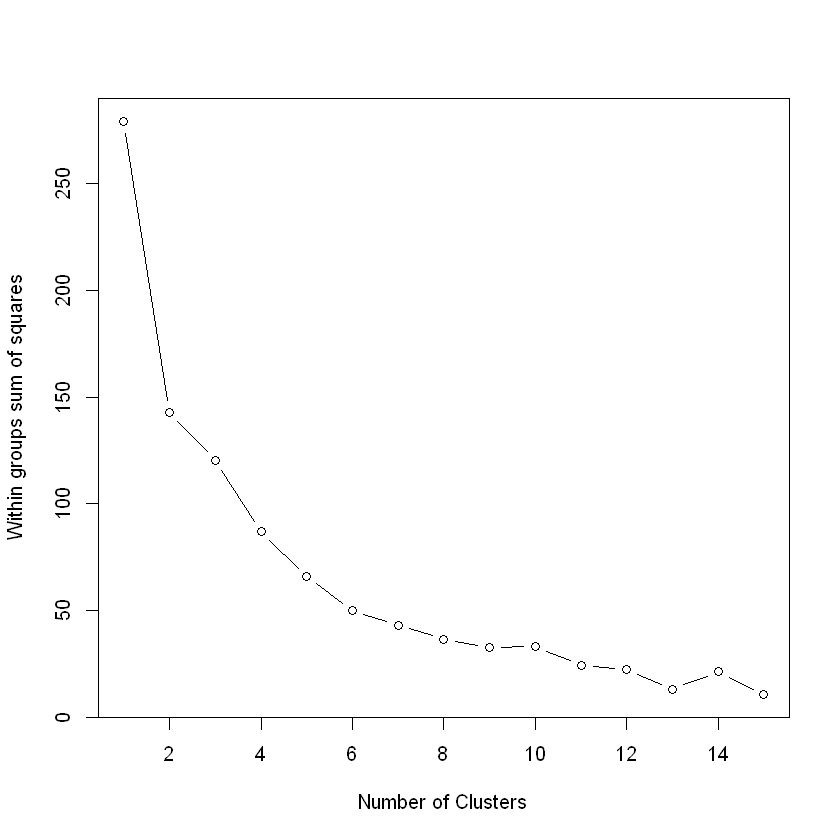

In [115]:
# K-means
# http://homes.sice.indiana.edu/yye/lab/teaching/topics/R/cluster.php
mydata = scale(mtcars[,c(1:7,10,11)]) #standarize variables

# Determine number of clusters
wss <- (nrow(mydata)-1)*sum(apply(mydata,2,var))
for (i in 2:15) wss[i] <- sum(kmeans(mydata, centers=i)$withinss)
plot(1:15, wss, type="b", xlab="Number of Clusters",  ylab="Within groups sum of squares")

In [116]:
# K-Means Cluster Analysis
fit <- kmeans(mydata, 5) # 5 cluster solution
# get cluster means 
aggregate(mydata,by=list(fit$cluster),FUN=mean)
# append cluster assignment
mydata <- data.frame(mydata, fit$cluster)

Group.1,mpg,cyl,disp,hp,drat,wt,qsec,gear,carb
1,-0.2639188,0.2149750,-0.1877116,0.4441961,0.49270241,-0.09282103,-0.7723684,1.0044285,1.2658760
2,-0.8363478,1.0148821,1.0238513,0.6924910,-0.88974768,0.90635862,-0.3952280,-0.9318192,0.1676779
3,1.3455193,-1.2248578,-0.9926026,-0.6517741,0.94157008,-1.42136994,-0.5868961,1.7789276,-0.5030337
4,1.8100994,-1.2248578,-1.2473657,-1.2315339,1.36705923,-1.35008427,0.7547806,0.4235542,-0.9673725
5,0.2788814,-0.9048949,-0.5710809,-0.7413686,-0.01761739,-0.28335417,1.1862836,-0.1573201,-0.8568156


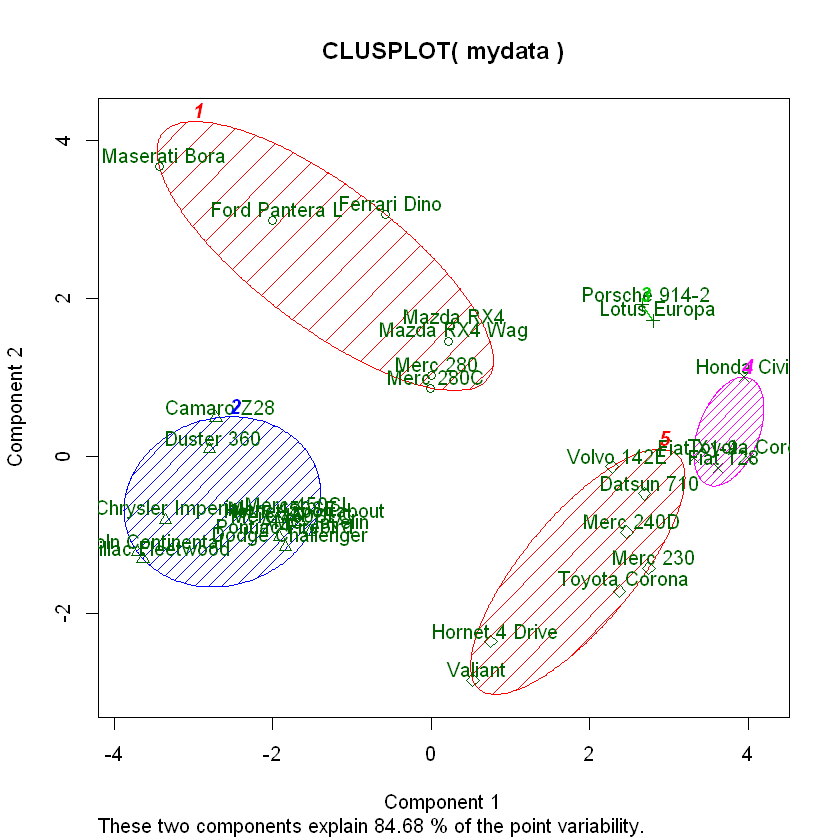

In [117]:
#visualize the clustering results
library(cluster) 
clusplot(mydata, fit$cluster, color=TRUE, shade=TRUE, labels=2, lines=0)